## UCLA Cross Validation Results Evaluation

In [1]:
import sys
sys.path.append("../")
sys.path.append("../../venv/lib/python3.6/site-packages/")

In [2]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

/home/jesper/tmp/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load the data

In [3]:
pred_dir = "models_preds"
base_name = "UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
# base_name = "test_datalen-40720_epochs-1_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"
folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loaded  5  folds


In [4]:
folds[0]

,imageHASH,name,violence,protest,sign,photo,fire,police,children,group_20,...,pred_sign,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting
0,511256126a6a1e0c,test-07348.jpg,0.333458,True,1,0,0,0,0,1,...,0.994565,0.063626,0.000507,0.008815,0.022379,0.842275,0.198759,0.083580,0.029882,0.036142
1,ede9d9c9c88ae0d6,train-03283.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.376494,0.027810,0.025073,0.487886,0.003935,0.381941,0.019645,0.019686,0.036234,0.047190
2,b2e696c878b3d575,train-20029.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.982910,0.086852,0.001896,0.007277,0.008259,0.739633,0.145699,0.015281,0.024400,0.018322
3,f83c7c3c8ca6838b,train-00111.jpg,0.400336,True,1,0,0,0,0,1,...,0.769771,0.045250,0.047624,0.087276,0.007411,0.966924,0.726164,0.263988,0.038284,0.049263
4,f0f0f0d0408d1532,test-07521.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.201966,0.006122,0.493159,0.486430,0.002229,0.892510,0.399043,0.054109,0.516381,0.019555
5,14b032c6e5993b0f,train-17454.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.578725,0.003721,0.007048,0.017141,0.001512,0.777640,0.193340,0.009933,0.783723,0.005331
6,615cfee8834fcd95,train-00471.jpg,0.148543,True,1,0,0,0,0,0,...,0.996156,0.077744,0.000135,0.000645,0.013056,0.343371,0.061523,0.005886,0.017814,0.004461
7,29183323635f8cac,train-32470.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.753189,0.037413,0.005913,0.030588,0.013281,0.488205,0.042563,0.760863,0.004060,0.047442
8,676767678da5439b,train-07124.jpg,0.331059,True,1,0,0,0,0,1,...,0.817017,0.008574,0.000884,0.027767,0.006483,0.951836,0.138284,0.014757,0.002526,0.009390
9,d9d154dcfc66f677,test-05435.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.988106,0.062381,0.001522,0.004283,0.001471,0.693876,0.062652,0.045766,0.047618,0.039926


### Protest

printing fold  0


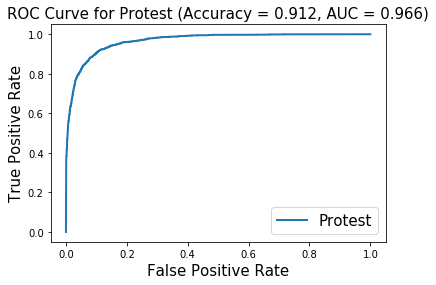

printing fold  1


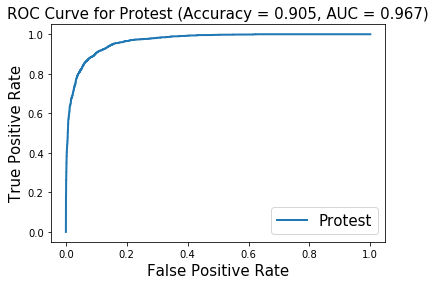

printing fold  2


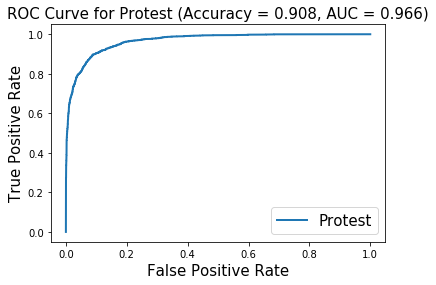

printing fold  3


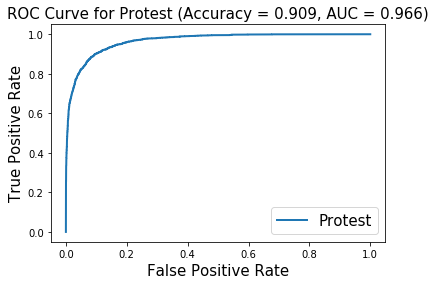

printing fold  4


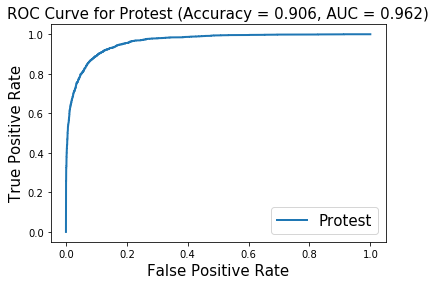

In [5]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

the rsquare measure has a mean of  0.8000150635923019  and standard deviation of  0.008075498903117272
the correlation measure has a mean of  0.8944242500080433  and standard deviation of  0.004508280143398806


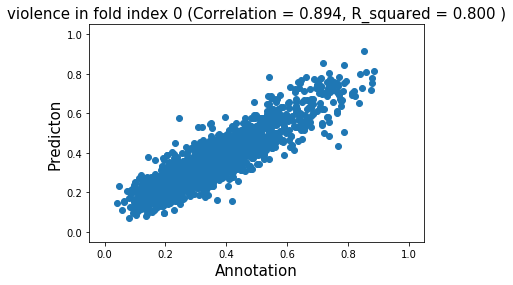

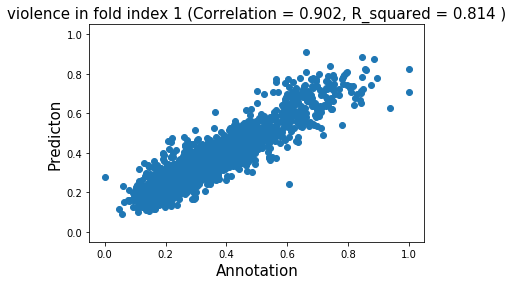

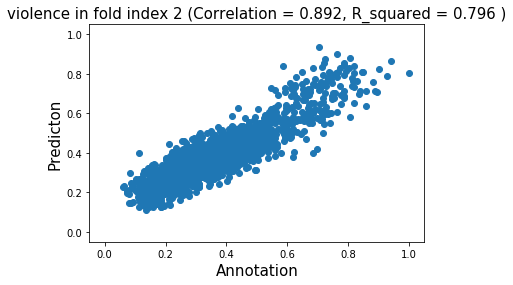

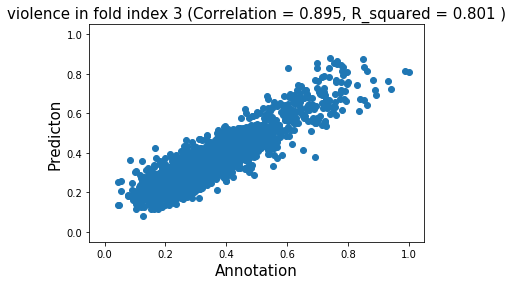

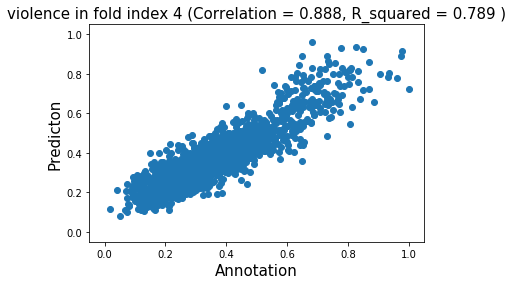

In [6]:
r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)